In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
a=pd.read_csv("Dataset for svm numeric example.csv")
a.head()

,Feature1,Feature2,Target
0,3,2,1
1,4,1,1
2,4,-1,1
3,5,2,1
4,5,0,1


In [15]:
a0=a[a.Target==0]
a1=a[a.Target==1]

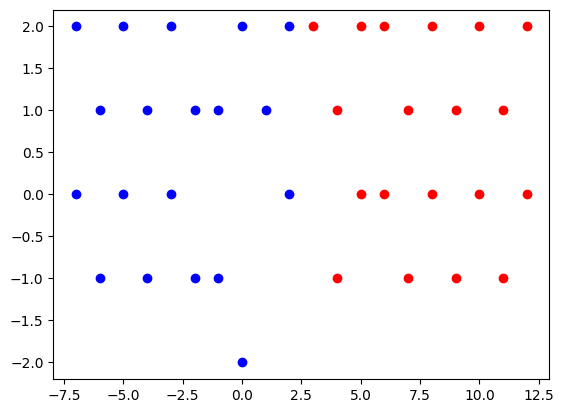

In [17]:
plt.scatter(a0['Feature1'],a0['Feature2'],color='blue')
plt.scatter(a1['Feature1'],a1['Feature2'],color='red')

In [34]:
import numpy as np

def svm(X, y):
    a_curr = 1
    b_curr = 1
    c_curr = 1
    
    for i in range(10000):
        res = X[i % len(y)][0] * a_curr + X[i % len(y)][1] * b_curr + c_curr
        if (res < 0 and( y[i%len(y)] == 1)):
            a_curr += 0.01 * X[i % len(y)][0]
            b_curr += 0.01 * X[i % len(y)][1]
            c_curr += 0.01
        elif (res > 0 and (y[i%len(y)] == 0)):
            a_curr -= 0.01 * X[i % len(y)][0]
            b_curr -= 0.01 * X[i % len(y)][1]
            c_curr -= 0.01
        
        a_curr *= 0.99
        b_curr *= 0.99
        c_curr *= 0.99
    
    return a_curr, b_curr, c_curr


In [27]:
X=np.array(a[['Feature1','Feature2']])
Y=np.array(a['Target'])

In [37]:
a,b,c=svm(X,Y)

In [51]:
def plot_line(a, b, c, x_range=(-5, 5)):
    # Generate x values
    x = np.linspace(x_range[0], x_range[1], 400)
    
    # Compute y values based on the line equation y = -a/b * x - c/b
    if b != 0:
        y = -a / b * x - c / b
    else:
        # If b is 0, the line is vertical, and x is constant
        x = np.full_like(x, -c / a)
        y = np.linspace(x_range[0], x_range[1], 400)

    # Plot the line
    plt.plot(x, y, '-r')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.axhline(0, color='black',linewidth=0.5)
    plt.axvline(0, color='black',linewidth=0.5)
    plt.scatter(a0['Feature1'],a0['Feature2'],color='blue')
    plt.scatter(a1['Feature1'],a1['Feature2'],color='red')
    # plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
    plt.show()


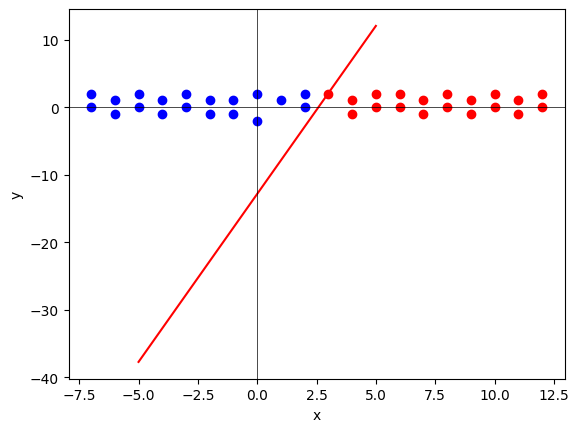

In [52]:
plot_line(a,b,c)